In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("C:\\Users\\Akshat.Dubey.000\\Desktop\\vgsales.csv")

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
x=df[["NA_Sales"]]
y=df[["Global_Sales"]]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
import matplotlib.pyplot as plt

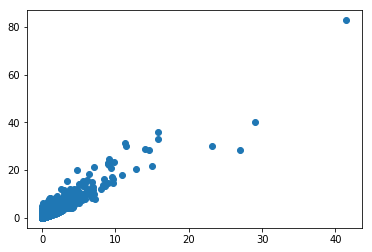

In [13]:
plt.scatter(x,y)

# Plotting learning curve

In [14]:
def plot_learning_curve(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_test))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

In [17]:
from sklearn.metrics import mean_squared_error

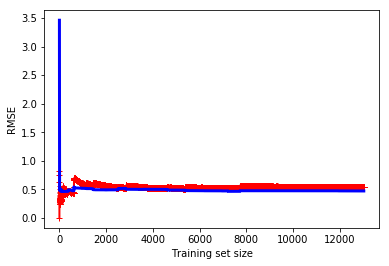

In [43]:
from sklearn.linear_model import Ridge
ridge_regression=Ridge()
plot_learning_curve(ridge_regression,x,y)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.9)

In [49]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)
y_pred=ridge_reg.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.54661111418088


In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.886408261350704
